<a href="https://colab.research.google.com/github/2020-nlp-c/nlp-deeplearning/blob/master/jisang/14_Word2Vec_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word2Vec 실습**

## **1. Word2Vec 구현**

In [3]:
doc = 'you will never know until you try'

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### **1-1. 데이터 전처리**

In [5]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

wl = WordNetLemmatizer()

# 문장 전처리
def tokenize(x):
    return x.split()
words = tokenize(doc)

tmp_docs = []
# Lemmatize
for word in words:
    tmp_docs.append(wl.lemmatize(word.lower(), pos = 'v' or 'n'))
# Pos Tagging
pos_docs = pos_tag(tmp_docs)

# 불용어 처리(stopWord)
stopPos = ['CC']
stopWord = [',']

docs_tokens = []
tokens = []

for pos_doc in pos_docs:
    # 불용 품사 지정
    if pos_doc[1] not in stopPos:
        # 불용어 지정
        if pos_doc[0] not in stopWord:
            # 문서 사용 단어
            docs_tokens.append(pos_doc[0])

# 전체 사용 단어
tokens = list(set(docs_tokens))

docs_tokens, tokens

(['you', 'will', 'never', 'know', 'until', 'you', 'try'],
 ['never', 'will', 'you', 'try', 'know', 'until'])

In [6]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 문자열 라벨링
label_enc = LabelEncoder()
label_docs = label_enc.fit_transform(docs_tokens)
# 바이너리 인코딩
onehot_enc = OneHotEncoder(sparse=False)
docs_label = label_docs.reshape(len(label_docs), 1) # n:1 matrix로 변환
onehot_docs = onehot_enc.fit_transform(docs_label)
    
index_name = []
for i in range(len(tokens)):
    index_name.append(label_enc.inverse_transform([i])[0])

onehot_docs, index_name

(array([[0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.]]),
 ['know', 'never', 'try', 'until', 'will', 'you'])

### **1-2. Window 생성**

In [7]:
window_size = 1
x = []
y = []

for i in range(len(onehot_docs)):
    tmp = []
    for j in range(i-window_size, i+window_size + 1):
        if j < 0:
            pass
        elif j > len(onehot_docs):
            pass
        elif 0 <= j < len(onehot_docs):
            if i != j:
                tmp.append(onehot_docs[j])
    x.append(tmp)
    y.append(onehot_docs[i])

x, y

([[array([0., 0., 0., 0., 1., 0.])],
  [array([0., 0., 0., 0., 0., 1.]), array([0., 1., 0., 0., 0., 0.])],
  [array([0., 0., 0., 0., 1., 0.]), array([1., 0., 0., 0., 0., 0.])],
  [array([0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0.])],
  [array([1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1.])],
  [array([0., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0., 0.])],
  [array([0., 0., 0., 0., 0., 1.])]],
 [array([0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 1., 0.]),
  array([0., 1., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 1.]),
  array([0., 0., 1., 0., 0., 0.])])

### **1-3. Feed Foward**

In [9]:
import numpy as np

k = 4

# X to Hidden Layer Weight
x2h = np.random.rand(len(tokens), k)
# Hidden Layer to Y Weight
h2y = np.random.rand(k, len(tokens))

hidden = []
for words in x:
    tmp = []
    for word in words:
        tmp.append(np.dot(x2h.T, word.T))
    hidden.append(tmp)

def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
        return y

y_predict = []
for words in hidden:
    tmp = []
    for word in words:
        tmp.append(softmax(np.dot(h2y.T, word)))
    y_predict.append(tmp)

hidden, y_predict

([[array([0.91531231, 0.80681487, 0.96364112, 0.02932918])],
  [array([0.68682455, 0.87508193, 0.8079959 , 0.82206858]),
   array([0.75889852, 0.88931172, 0.91856484, 0.71864551])],
  [array([0.91531231, 0.80681487, 0.96364112, 0.02932918]),
   array([0.22559999, 0.23431438, 0.3616103 , 0.14395632])],
  [array([0.75889852, 0.88931172, 0.91856484, 0.71864551]),
   array([0.25613346, 0.07924162, 0.18024056, 0.13702723])],
  [array([0.22559999, 0.23431438, 0.3616103 , 0.14395632]),
   array([0.68682455, 0.87508193, 0.8079959 , 0.82206858])],
  [array([0.25613346, 0.07924162, 0.18024056, 0.13702723]),
   array([0.73902041, 0.51623748, 0.98880999, 0.48948934])],
  [array([0.68682455, 0.87508193, 0.8079959 , 0.82206858])]],
 [[array([0.12817671, 0.18628692, 0.12350101, 0.30228083, 0.13484063,
          0.12491391])],
  [array([0.09142906, 0.16339624, 0.11100158, 0.32544692, 0.19722163,
          0.11150458]),
   array([0.09274184, 0.16306951, 0.11034048, 0.33375096, 0.18828853,
          0.1

### **1-4. Loss 계산**

In [10]:
loss = []
for i, predict in enumerate(y_predict):
    tmp = []
    for j in range(len(predict)):
        tmp.append(np.log(predict[j]) * y[i])
    loss.append(np.sum(tmp))
loss = -np.sum(loss)
loss

21.914449587056303

### **1-5. Back Propagation**

In [15]:
alpha = 0.01
diff = []
h_layer = []
x_layer = []

for i in range(len(y)):
    for j in range(len(y_predict[i])):
        diff.append(y_predict[i][j] - y[i])
        h_layer.append(hidden[i][j])
        x_layer.append(x[i][j])

gradient_h2y = np.dot(np.matrix(h_layer).T, np.matrix(diff))
gradient_x2h = np.dot(np.matrix(x_layer).T, np.dot(h2y, np.matrix(diff).T).T)

h2y -= alpha * gradient_h2y
x2h -= alpha * gradient_x2h

# np.array(h2y), np.array(x2h)
h2y

array([[0.61747515, 0.79238669, 0.69368524, 0.58830524, 0.01589807,
        0.25922802],
       [0.36739575, 0.68990587, 0.04507633, 0.7358636 , 0.2727203 ,
        0.23582402],
       [0.17623235, 0.14498293, 0.35227882, 0.88838851, 0.8447902 ,
        0.53244101],
       [0.02549304, 0.32968146, 0.39965593, 0.65471874, 0.8898419 ,
        0.30674924]])

### **1-6. 예측 결과값 출력**

In [31]:
import pandas as pd

index_name = []
for i in range(len(tokens)):
    index_name.append(label_enc.inverse_transform([i])[0])

pd.DataFrame(x2h, index_name)

,0,1,2,3
know,0.446892,0.198421,0.294093,0.630864
never,0.018422,0.501943,0.278398,0.539384
try,0.948455,0.870309,0.397729,0.185688
until,0.958821,0.173427,0.474111,0.485726
will,0.056313,0.100421,0.450238,0.549898
you,0.151399,0.960580,0.412304,0.950751


### **1-7. 예측 결과 유사도 계산**

In [33]:
from numpy import dot
from numpy.linalg import norm

def calc_similarity_matrix(vectors) :
    def cosine_similarity(a, b) : 
        return dot(a, b.T)/(norm(a)*norm(b.T))

    n_word = len(vectors)
    similarity_matrix = np.zeros((n_word, n_word))

    for i in range(n_word) :
        for j in range(i, n_word) :
            similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4)  
            #similarity_matrix[i, j] = similarity_matrix[j, i]

    return similarity_matrix

pd.DataFrame(calc_similarity_matrix(x2h), index=index_name, columns=index_name)

,know,never,try,until,will,you
know,1.0000,0.7908,0.7180,0.8997,0.8563,0.8101
never,0.7908,1.0000,0.6208,0.5330,0.8346,0.9937
try,0.7180,0.6208,1.0000,0.8292,0.4310,0.6830
until,0.8997,0.5330,0.8292,1.0000,0.6456,0.5742
will,0.8563,0.8346,0.4310,0.6456,1.0000,0.7950
you,0.8101,0.9937,0.6830,0.5742,0.7950,1.0000


### **1-8. 예측 결과 시각화**

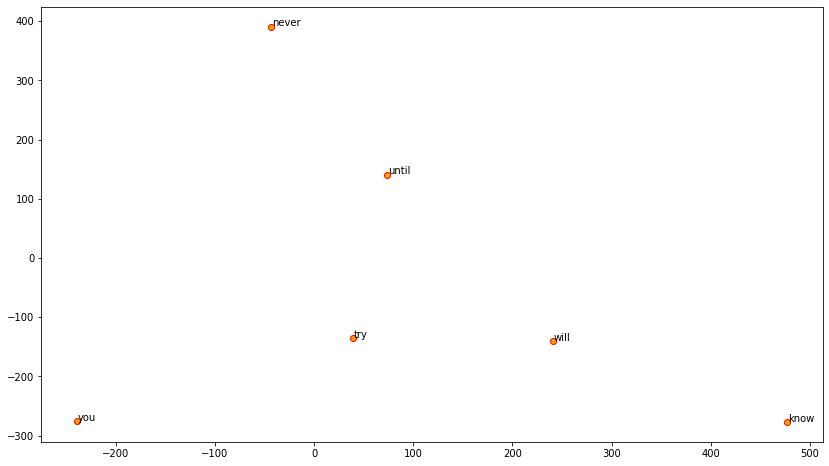

In [55]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(x2h)
labels = index_name
plt.figure(figsize=(14,8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## **2. Word2Vec 클래스화**

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### **2-1. Word2Vec 클래스**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import argmax
from numpy import dot
from numpy.linalg import norm
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

class Word2Vec():
    def __init__(self):
        self.stopPos = ['CC']
        self.stopWord = [',']
        self.docs_tokens = []
        self.tokens = []
        self.index_name = []
        self.onehot_docs = []
        self.x = []
        self.y = []
        self.x2h = []
        self.h2y = []
        self.hidden = []
        self.y_predict = []
        self.loss = []

    # 문장 전처리
    def wrod_preprocessing(self, doc):
        wl = WordNetLemmatizer()
        # 띄어쓰기 기준으로 토큰화
        def tokenize(x):
            return x.split()
        words = tokenize(doc)
        # Lemmatize
        tmp_docs = []
        for word in words:
            tmp_docs.append(wl.lemmatize(word.lower(), pos = 'v' or 'n'))
        # Pos Tagging
        pos_docs = pos_tag(tmp_docs)
        # 불용어 처리(stopWord)
        for pos_doc in pos_docs:
            # 불용 품사 지정
            if pos_doc[1] not in self.stopPos:
                # 불용어 지정
                if pos_doc[0] not in self.stopWord:
                    # 문서 사용 단어
                    self.docs_tokens.append(pos_doc[0])
        # 전체 사용 단어
        self.tokens = list(set(self.docs_tokens))
        
        return self.docs_tokens, self.tokens

    # 라벨링
    def labeling_word(self):
        # 문자열 라벨링
        label_enc = LabelEncoder()
        label_docs = label_enc.fit_transform(self.docs_tokens)
        # 바이너리 인코딩
        onehot_enc = OneHotEncoder(sparse=False)
        docs_label = label_docs.reshape(len(label_docs), 1) # n:1 matrix로 변환
        self.onehot_docs = onehot_enc.fit_transform(docs_label)
        # 문자 라벨 순서 저장
        for i in range(len(self.tokens)):
            self.index_name.append(label_enc.inverse_transform([i])[0])

        return self.onehot_docs, self.index_name

    # window 생성
    def make_window(self, window_size):
        for i in range(len(self.onehot_docs)):
            tmp = []
            for j in range(i-window_size, i+window_size + 1):
                if j < 0:
                    pass
                elif j > len(self.onehot_docs):
                    pass
                elif 0 <= j < len(self.onehot_docs):
                    if i != j:
                        tmp.append(self.onehot_docs[j])
            self.x.append(tmp)
            self.y.append(self.onehot_docs[i])

        return self.x, self.y

    # Weight 생성
    def make_weight(self, k):
        # X to Hidden Layer Weight
        self.x2h = np.random.rand(len(self.tokens), k)
        # Hidden Layer to Y Weight
        self.h2y = np.random.rand(k, len(self.tokens))

        return self.x2h, self.h2y

    # Feed Foward
    def predict_Y(self):
        # X to Hidden Layer 과정
        tmp_hidden = []
        for words in self.x:
            tmp = []
            for word in words:
                tmp.append(np.dot(self.x2h.T, word.T))
            tmp_hidden.append(tmp)
        self.hidden = tmp_hidden

        # SoftMax 함수
        def softmax(a) :
            return np.exp(a) / np.sum(np.exp(a))

        # Hidden Layer to Y
        tmp_predict = []
        for words in self.hidden:
            tmp = []
            for word in words:
                tmp.append(softmax(np.dot(self.h2y.T, word.T)))
            tmp_predict.append(tmp)
        self.y_predict = tmp_predict

        # Loss 값
        loss_tmp = []
        for i, predict in enumerate(self.y_predict):
            tmp = []
            for j in range(len(predict)):
                tmp.append(np.log(predict[j]) * self.y[i])
            loss_tmp.append(np.sum(tmp))
        self.loss = loss_tmp
        self.loss = -np.sum(self.loss)
        
        return self.hidden, self.y_predict, self.loss

    # Back Propagation 구현
    def back_propagation(self, alpha):
        diff = []
        h_layer = []
        x_layer = []
        for i in range(len(self.y)):
            for j in range(len(self.y_predict[i])):
                diff.append(self.y_predict[i][j] - self.y[i])
                h_layer.append(self.hidden[i][j])
                x_layer.append(self.x[i][j])

        # Weight 갱신
        gradient_h2y = np.dot(np.matrix(h_layer).T, np.matrix(diff))
        gradient_x2h = np.dot(np.matrix(x_layer).T, np.dot(self.h2y, np.matrix(diff).T).T)
        self.h2y -= alpha * gradient_h2y
        self.x2h -= alpha * gradient_x2h

        return self.h2y, self.x2h

    # 단어 벡터 시각화
    def visualize(self):
        tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
        np.set_printoptions(suppress=True)
        T = tsne.fit_transform(self.x2h)
        labels = self.index_name
        plt.figure(figsize=(14,8))
        plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
        for label, x, y in zip(labels, T[:, 0], T[:, 1]):
            plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')
        # 코사인 유사도 계산
        def calc_similarity_matrix(vectors) :
            def cosine_similarity(a, b) : 
                return dot(a, b.T)/(norm(a)*norm(b.T))
            n_word = len(vectors)
            similarity_matrix = np.zeros((n_word, n_word))
            for i in range(n_word) :
                for j in range(i, n_word) :
                    similarity_matrix[j, i] = cosine_similarity(vectors[i], vectors[j]).round(4) 
                    similarity_matrix[i, j] = similarity_matrix[j, i]
            return similarity_matrix

        print(pd.DataFrame(calc_similarity_matrix(self.x2h), index=self.index_name, columns=self.index_name))

    # 자동 실행
    def run(self, doc, window_size, k, alpha, epochs):
        self.wrod_preprocessing(doc)
        self.labeling_word()
        self.make_window(window_size)
        self.make_weight(k)
        count_epoch = 0
        loss_history = []
        count_history = []
        for i in range(epochs):
            self.predict_Y()
            self.back_propagation(alpha)
            count_epoch += 1
            count_history.append(count_epoch)
            loss_history.append(self.loss)
            # if epochs % 100 == 0:
            #     self.visualize()        
        print("반복횟수 : {}".format(count_epoch))
        print("Loss : {}".format(self.loss))
        print("예측 결과 :")
        plt.plot(count_history, loss_history)
        plt.title("Loss History")
        plt.show()
        print(pd.DataFrame(self.x2h, self.index_name))
        self.visualize()

### **2-2. 클래스 결과 확인**

In [39]:
w2v = Word2Vec()

In [40]:
doc = 'you will never know until you try'

반복횟수 : 10000
Loss : 8.845982622202225
예측 결과 :


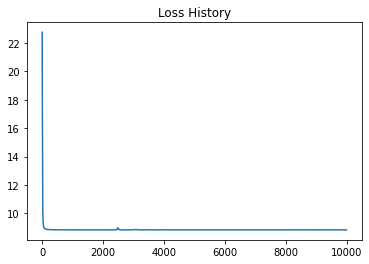

              0         1         2         3
know   0.146042  2.564897 -1.641249  1.359021
never -0.213886  0.925807  1.791020 -2.555439
try    2.718913 -0.506630  1.361121  1.601598
until  2.265799 -0.834381  1.291815 -1.070838
will   2.290933 -0.256469 -1.357707  1.212824
you   -2.294772  1.166491  1.484921  1.159966
         know   never     try   until    will     you
know   1.0000 -0.3737 -0.0828 -0.5487  0.3624  0.1687
never -0.3737  1.0000 -0.2388  0.3955 -0.6531  0.1217
try   -0.0828 -0.2388  1.0000  0.6488  0.6324 -0.2663
until -0.5487  0.3955  0.6488  1.0000  0.2723 -0.5860
will   0.3624 -0.6531  0.6324  0.2723  1.0000 -0.6580
you    0.1687  0.1217 -0.2663 -0.5860 -0.6580  1.0000


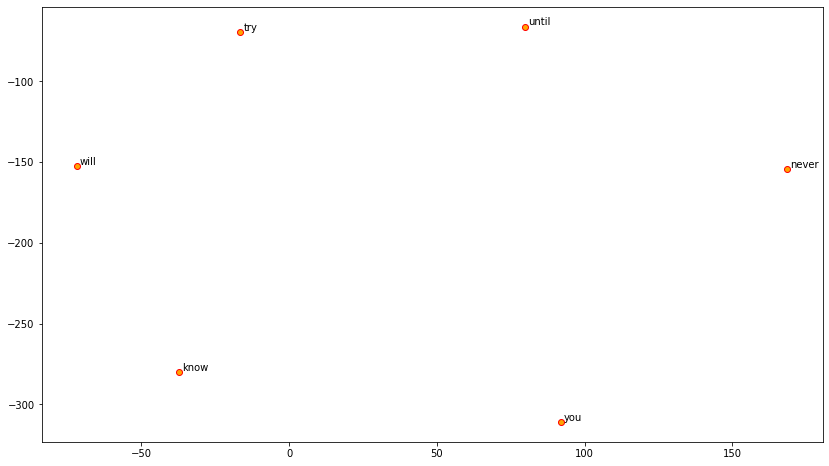

In [41]:
w2v.run(doc, 1, 4, 0.1, 10000) # 결과가 좋지 못한것으로 보아 Loss를 계산하는 과정에 문제가 있는 것 같습니다.